# Exemplo de análise de dados com Pandas

Os dados utilizados nesta análise podem ser baixados no seguinte endereço eletrônico: [http://ec.europa.eu/eurostat/data/database](http://ec.europa.eu/eurostat/data/database).

- Bibliotecas necessárias:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
plt.style.use('bmh')

- Leitura dos dados:

In [3]:
edu = pd.read_csv('../data/educ_figdp_1_Data.csv', na_values=':', usecols=['TIME', 'GEO', 'Value'])

In [4]:
edu

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
...,...,...,...
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85


- Resumo estatístico dos dados:

In [5]:
edu.describe()

,TIME,Value
count,384.000000,361.000000
mean,2005.500000,5.203989
std,3.456556,1.021694
min,2000.000000,2.880000
25%,2002.750000,4.620000
50%,2005.500000,5.060000
75%,2008.250000,5.660000
max,2011.000000,8.810000


In [6]:
edu['ValueNorm'] = edu['Value'] / edu['Value'].max()

edu.tail()

,TIME,GEO,Value,ValueNorm
379,2007,Finland,5.90,0.669694
380,2008,Finland,6.10,0.692395
381,2009,Finland,6.81,0.772985
382,2010,Finland,6.85,0.777526
383,2011,Finland,6.76,0.767310


In [7]:
filtered_data =edu[edu['TIME'] > 2005]
pivedu = pd.pivot_table(filtered_data, values = 'Value', index = ['GEO'], columns = ['TIME'])

pivedu.head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,5.40,5.33,5.47,5.98,5.91,5.80
Belgium,5.98,6.00,6.43,6.57,6.58,6.55
Bulgaria,4.04,3.88,4.44,4.58,4.10,3.82
Cyprus,7.02,6.95,7.45,7.98,7.92,7.87
Czech Republic,4.42,4.05,3.92,4.36,4.25,4.51


In [8]:
pivedu = pivedu.drop([
    'Euro area (13 countries)',
    'Euro area (15 countries)',
    'Euro area (17 countries)',
    'Euro area (18 countries)',
    'European Union (25 countries)',
    'European Union (27 countries)',
    'European Union (28 countries)'
], axis = 0)

In [9]:
pivedu = pivedu.rename(index = {'Germany (until 1990 former territory of the FRG)' : 'Germany'})
piveedu = pivedu.dropna()
pivedu.rank(ascending=False, method='first').head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,10.0,7.0,11.0,7.0,8.0,8.0
Belgium,5.0,4.0,3.0,4.0,5.0,5.0
Bulgaria,21.0,22.0,20.0,20.0,22.0,22.0
Cyprus,2.0,2.0,2.0,2.0,2.0,3.0
Czech Republic,19.0,21.0,21.0,21.0,20.0,19.0


In [10]:
totalSum = pivedu.sum(axis = 1)
totalSum.rank(ascending = False, method = 'dense')\
    .sort_values().head()

GEO
Denmark    1.0
Cyprus     2.0
Finland    3.0
Malta      4.0
Belgium    5.0
dtype: float64

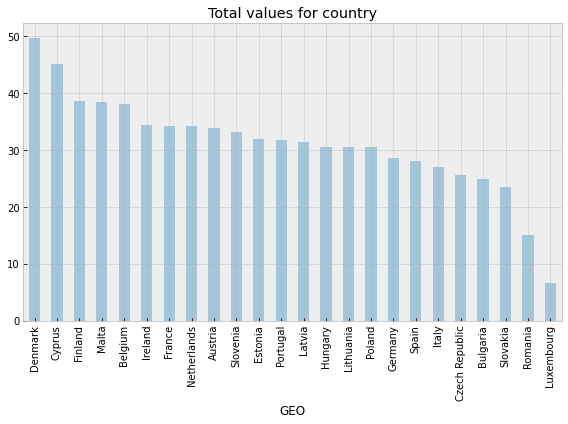

In [11]:
totalSum = pivedu.sum(axis = 1)\
    .sort_values(ascending = False)

fig = plt.figure(figsize=(8,6))
ax = totalSum.plot(kind='bar', style='b', alpha=0.4, title='Total values for country')
plt.tight_layout()
plt.show()

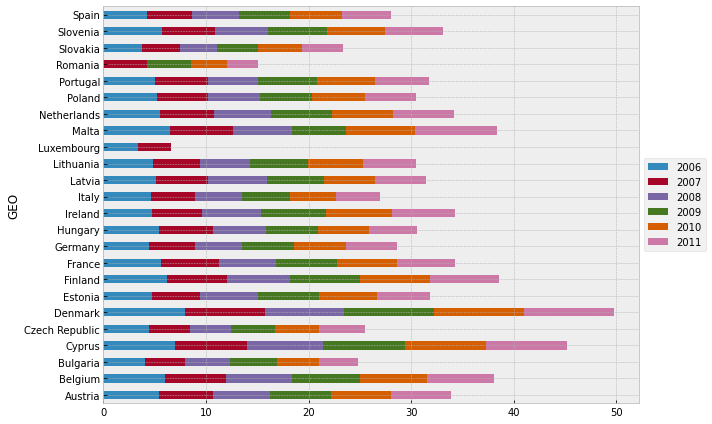

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
pivedu.plot(
    kind = 'barh',
    stacked = True,
    ax = ax
)
ax.legend(loc = 'center left', bbox_to_anchor = (1, .5))
plt.tight_layout()
plt.show()
